In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

path = 'VR5/Vehicle/'
veh = sorted(['VR5/Vehicle/'+f for f in os.listdir('VR5/Vehicle/') if '.npy' in f and 'Rside' in f])
veh

['VR5/Vehicle/VR5_Vehicle PFC-HPC_Rside Rewarded Theta xcorr by trial.npy',
 'VR5/Vehicle/VR5_Vehicle PFC-HPC_Rside Unrewarded Theta xcorr by trial.npy']

In [2]:
def plot_xcorr_bytrial(xcorr_bytrial, title):
    def _sort_trials_by_max(unsorted_bytrial):
        iimax = []
        for i, arr in enumerate(unsorted_bytrial):
            i_max = np.where(arr == np.max(arr))[0].item()
            iimax.append((arr, i_max))

        arr_imax_sort = sorted(iimax, key=lambda x: x[1])
        arr_sortbymax = np.array([arr for arr, i in arr_imax_sort])
        
        return np.flip(arr_sortbymax, axis=0)
    
    def _norm_minmax(raw_xcorr_bytrial):
        norm = [(arr - np.min(arr)) / (np.max(arr) - np.min(arr)) for arr in raw_xcorr_bytrial]
        
        return np.array(norm)
        
    xcorr_bytrial = _sort_trials_by_max(xcorr_bytrial)
    xcorr_bytrial = _norm_minmax(xcorr_bytrial)

    f, ax = plt.subplots(figsize=(6,4.5))
    im = ax.imshow(xcorr_bytrial, cmap='jet', aspect='auto', vmin=0, vmax=1, interpolation='nearest', origin='lower')
    ax.axes.axvline(200,c='k',ls='--')
    ax.tick_params(axis='both', labelsize=18)
    
    # x axis
    lag_ticks = np.linspace(0,400,5).tolist()
    lags = np.linspace(-100,100,5).astype(int)
    ax.set_xticks(lag_ticks) 
    ax.set_xticklabels(lags)
    ax.set_xlabel('Lag (ms)', fontsize=20)

    
    # y axis
    ax.set_yticks([0, len(xcorr_bytrial)//2-1, len(xcorr_bytrial)-1])
    ax.set_yticklabels([1, len(xcorr_bytrial)//2, len(xcorr_bytrial)])
    ax.set_ylabel('Trial', fontsize=20)
    ax.set_title(title)
    

    cbar = f.colorbar(im, ax=ax, ticks=[np.min(xcorr_bytrial), np.max(xcorr_bytrial)], shrink=0.9)
    cbar.ax.set_yticklabels(['min','max'])
    cbar.ax.tick_params(labelsize=18)
    
    plt.tight_layout()
    plt.savefig(title.replace('\n', ' ')+'.png', dpi=600)
    
def get_peaklag(trials):
    def _get_peaklag_index(trials):
        peaklag_i = []
        for i, arr in enumerate(trials):
            peaklag_index = np.where(arr == np.max(arr))[0].item()
            peaklag_i.append(peaklag_index)
            
        return peaklag_i
    
    def _convert_index2time(peaklags):
        time = np.linspace(-100,100,401) # from shape of xcorr_bytrial given fs=2000, twin=[-100,100ms]
        peaklag_t = []
        
        for index in peaklags:
            t = time[index]
            peaklag_t.append(t)
            
        return peaklag_t
    
    peaklags = _get_peaklag_index(trials)
    peaklag_t = _convert_index2time(peaklags)
    
    return peaklag_t

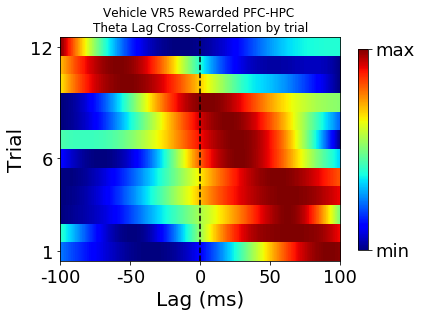

In [3]:
xcorr_bytrial = np.load(veh[0], allow_pickle=True)    
plot_xcorr_bytrial(xcorr_bytrial, 'Vehicle VR5 Rewarded PFC-HPC \nTheta Lag Cross-Correlation by trial')

t_peaklags = get_peaklag(xcorr_bytrial)
df = pd.DataFrame()
df['Vehicle_VR5'] = t_peaklags
df.to_csv('Vehicle_VR5_rewarded_peak_xcorr_lag.csv')

(59, 401)


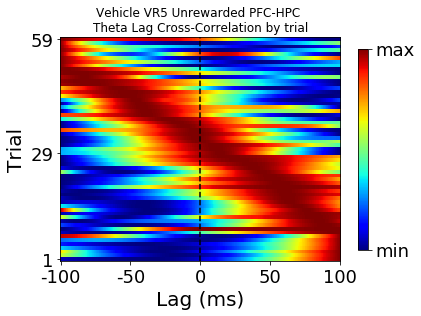

In [4]:
xcorr_bytrial = np.load(veh[1], allow_pickle=True)  
print(np.shape(xcorr_bytrial))
plot_xcorr_bytrial(xcorr_bytrial, 'Vehicle VR5 Unrewarded PFC-HPC \nTheta Lag Cross-Correlation by trial')

t_peaklags = get_peaklag(xcorr_bytrial)
df = pd.DataFrame()
df['Vehicle_VR5'] = t_peaklags
df.to_csv('Vehicle_VR5_unrewarded_peak_xcorr_lag.csv')

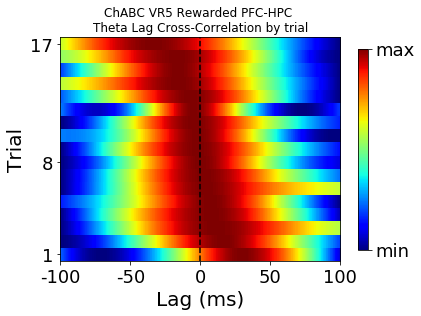

In [5]:
path = 'VR5/ChABC/'
abc = sorted([path+f for f in os.listdir(path) if '.npy' in f and 'Rside' in f])

xcorr_bytrial = np.load(abc[0], allow_pickle=True)    
plot_xcorr_bytrial(xcorr_bytrial, 'ChABC VR5 Rewarded PFC-HPC \nTheta Lag Cross-Correlation by trial')

t_peaklags = get_peaklag(xcorr_bytrial)
df = pd.DataFrame()
df['ChABC_VR5'] = t_peaklags
df.to_csv('ChABC_VR5_rewarded_peak_xcorr_lag.csv')

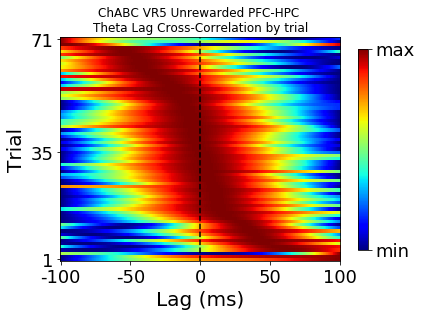

In [6]:
xcorr_bytrial = np.load(abc[1], allow_pickle=True)    
plot_xcorr_bytrial(xcorr_bytrial, 'ChABC VR5 Unrewarded PFC-HPC \nTheta Lag Cross-Correlation by trial')

t_peaklags = get_peaklag(xcorr_bytrial)
df = pd.DataFrame()
df['ChABC_VR5'] = t_peaklags
df.to_csv('ChABC_VR5_unrewarded_peak_xcorr_lag.csv')

In [7]:
path = 'VR5/PFC(R)-PFC(L)/'
files = sorted([path+f for f in os.listdir(path) if '.npy' in f])
print('i\tfile')
for i, f in enumerate(files):
    print(f'{i}\t{f}')

i	file
0	VR5/PFC(R)-PFC(L)/VR5_ChABC PFC(R)-PFC(L) Rewarded Theta xcorr bytrial.npy
1	VR5/PFC(R)-PFC(L)/VR5_ChABC PFC(R)-PFC(L) Unrewarded Theta xcorr bytrial.npy
2	VR5/PFC(R)-PFC(L)/VR5_Vehicle PFC(R)-PFC(L) Rewarded Theta xcorr bytrial.npy
3	VR5/PFC(R)-PFC(L)/VR5_Vehicle PFC(R)-PFC(L) Unrewarded Theta xcorr bytrial.npy


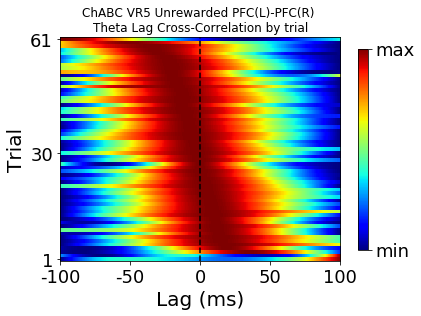

In [8]:
xcorr_bytrial = np.load(files[1], allow_pickle=True)    
plot_xcorr_bytrial(xcorr_bytrial, 'ChABC VR5 Unrewarded PFC(L)-PFC(R) \nTheta Lag Cross-Correlation by trial')

t_peaklags = get_peaklag(xcorr_bytrial)
df = pd.DataFrame()
df['Vehicle_VR5'] = t_peaklags
df.to_csv('ChABC_VR5_unrewarded_peak_pfc-pfc_xcorr_lag.csv')

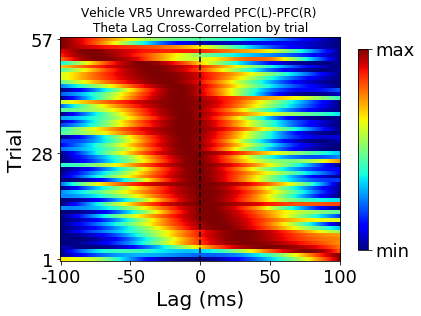

In [9]:
xcorr_bytrial = np.load(files[3], allow_pickle=True)    
plot_xcorr_bytrial(xcorr_bytrial, 'Vehicle VR5 Unrewarded PFC(L)-PFC(R) \nTheta Lag Cross-Correlation by trial')

t_peaklags = get_peaklag(xcorr_bytrial)
df = pd.DataFrame()
df['Vehicle_VR5'] = t_peaklags
df.to_csv('Vehicle_VR5_unrewarded_peak_pfc-pfc_xcorr_lag.csv')